In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings as ws
ws.filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes.csv")

In [45]:
df.head()

pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   diabetespedigreefunction       age  outcome  
0                     0.627  3.912023        1  
1                     0.351  3.433987        0  
2                     0.672  3.465736        1  
3                     0.167  3.044522        0  
4                     2.288  3.496508        1

In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
def clean_name(name):
    return name.strip().lower().replace(" ", "_")

In [6]:
df.rename(columns=clean_name, inplace=True)

In [7]:
df.head()

pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   diabetespedigreefunction  age  outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [8]:
X= df.drop("outcome", axis = 1)
y = df["outcome"]

In [9]:
X.head()

pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   diabetespedigreefunction  age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [10]:
X[["insulin", "skinthickness"]] =  X[["insulin", "skinthickness"]].replace({0: np.nan})

In [11]:
X.fillna(df.median(), inplace=True)

In [12]:
X.head()

pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0            6      148             72           35.0     30.5  33.6   
1            1       85             66           29.0     30.5  26.6   
2            8      183             64           23.0     30.5  23.3   
3            1       89             66           23.0     94.0  28.1   
4            0      137             40           35.0    168.0  43.1   

   diabetespedigreefunction  age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [13]:
X.isna().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
dtype: int64

In [14]:
# Splitting the data

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in df.columns.to_list():
    sns.distplot(df[i])
    plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [16]:
df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

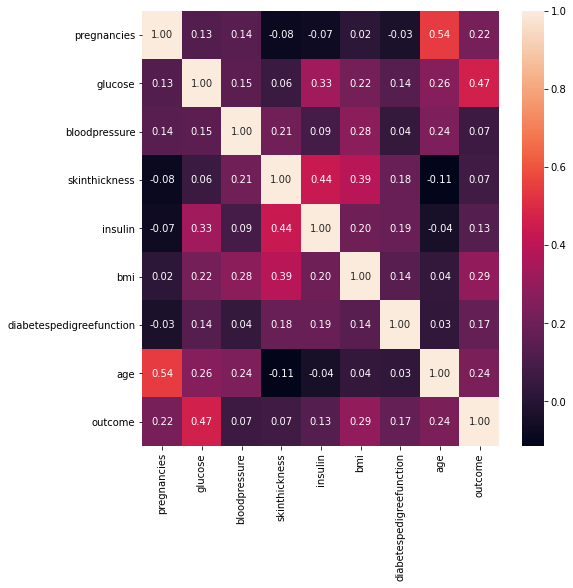

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot = True, fmt = ".2f")

In [18]:
pd.DataFrame(df.corr()["outcome"]).reset_index().rename(columns= {'index' : "col", "outcome" : "correlation"}).sort_values(by = "correlation", ascending = False)

col  correlation
8                   outcome     1.000000
1                   glucose     0.466581
5                       bmi     0.292695
7                       age     0.238356
0               pregnancies     0.221898
6  diabetespedigreefunction     0.173844
4                   insulin     0.130548
3             skinthickness     0.074752
2             bloodpressure     0.065068

In [19]:
col = ['glucose', 'bmi', 'age', 'pregnancies']
X = df[col]

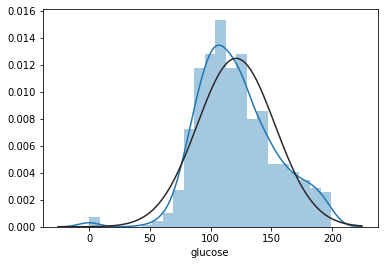

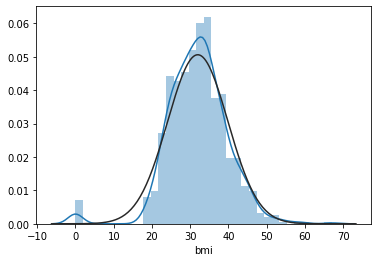

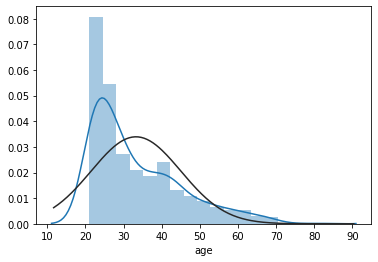

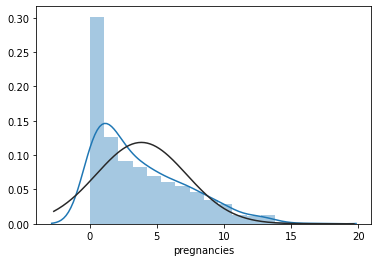

In [20]:
from scipy.stats import norm
for i in X.columns.to_list():
    sns.distplot(df[i], fit=norm)
    plt.show()

In [26]:
X.age = np.log(X.age)

In [27]:
X.head()

glucose   bmi       age  pregnancies
0      148  33.6  3.912023            6
1       85  26.6  3.433987            1
2      183  23.3  3.465736            8
3       89  28.1  3.044522            1
4      137  43.1  3.496508            0

In [30]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state = 42, stratify = y)
from sklearn.preprocessing import StandardScaler
scaler_ = StandardScaler()
X_train = scaler_.fit_transform(X_train)
X_test = scaler_.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
for i in [LogisticRegression(), GaussianNB(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]:
    i.fit(X_train,y_train)
    y_pred = i.predict(X_test)
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(y_test, y_pred)
    print(i.__class__.__name__ , " score is ", acc)

LogisticRegression  score is  0.7207792207792207
GaussianNB  score is  0.7272727272727273
KNeighborsClassifier  score is  0.7142857142857143
DecisionTreeClassifier  score is  0.6948051948051948
RandomForestClassifier  score is  0.7597402597402597


In [34]:
# Tuning the  RandomForest

param = {
    'max_depth' : [4,6],
    'n_estimators' : [100,200,500],
}
rf = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
gsv = GridSearchCV(rf, param, scoring="roc_auc", cv = 3,  verbose = 1)
gsv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [35]:
gsv.best_params_

{'max_depth': 4, 'n_estimators': 100}

In [36]:
gsv.best_score_

0.8268446295315354

In [37]:
# Final rfe
rf_final = RandomForestClassifier(**gsv.best_params_)

In [38]:
rf_final.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
y_pred = rf_final.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [41]:
print (accuracy_score(y_test, y_pred))

0.7272727272727273


In [42]:
print(confusion_matrix(y_test, y_pred))

[[84 16]
 [26 28]]


### clearly the model is overfitting the data hene we need the more data and hence this will remove the overfitting

In [46]:
from sklearn import preprocessing

In [53]:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=True)

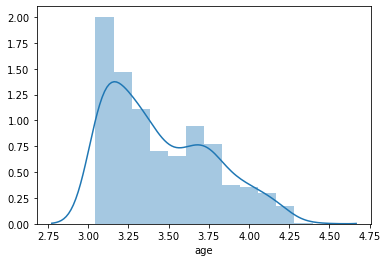

In [54]:
sns.distplot(df.age)

In [58]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
age = rbs.fit_transform(.age)
age

ValueError: Expected 2D array, got 1D array instead:
array=[3.91202301 3.4339872  3.4657359  3.04452244 3.49650756 3.40119738
 3.25809654 3.36729583 3.97029191 3.98898405 3.40119738 3.52636052
 4.04305127 4.07753744 3.93182563 3.4657359  3.4339872  3.4339872
 3.49650756 3.4657359  3.29583687 3.91202301 3.71357207 3.36729583
 3.93182563 3.71357207 3.76120012 3.09104245 4.04305127 3.63758616
 4.09434456 3.33220451 3.09104245 3.33220451 3.80666249 3.49650756
 3.55534806 3.8286414  3.29583687 4.02535169 3.25809654 3.61091791
 3.87120101 3.98898405 3.68887945 3.21887582 3.36729583 3.09104245
 3.4339872  3.17805383 3.09104245 3.25809654 3.40119738 4.06044301
 3.73766962 3.04452244 3.71357207 3.4339872  3.78418963 3.09104245
 3.04452244 3.66356165 3.58351894 3.17805383 3.73766962 3.4657359
 3.63758616 3.98898405 3.21887582 3.29583687 3.33220451 3.25809654
 3.73766962 3.13549422 3.09104245 3.09104245 3.71357207 3.29583687
 3.25809654 3.17805383 3.09104245 3.09104245 3.58351894 3.09104245
 3.61091791 3.29583687 3.80666249 3.25809654 3.76120012 3.17805383
 3.04452244 3.52636052 3.73766962 4.09434456 3.04452244 3.68887945
 3.17805383 3.09104245 3.13549422 3.4339872  3.49650756 3.09104245
 3.04452244 3.17805383 3.29583687 3.04452244 3.29583687 3.61091791
 3.21887582 3.17805383 3.17805383 3.8286414  3.13549422 3.21887582
 3.66356165 4.11087386 3.63758616 3.21887582 3.09104245 3.04452244
 3.21887582 3.17805383 3.13549422 4.2341065  3.13549422 3.25809654
 3.40119738 3.13549422 3.68887945 4.12713439 3.49650756 3.49650756
 3.40119738 3.66356165 3.25809654 3.4339872  3.04452244 3.09104245
 3.36729583 3.33220451 4.00733319 3.63758616 3.09104245 3.73766962
 3.13549422 3.04452244 3.71357207 3.52636052 4.17438727 3.09104245
 3.17805383 3.61091791 3.73766962 3.13549422 3.76120012 3.58351894
 3.04452244 3.13549422 3.09104245 3.8501476  3.58351894 3.80666249
 3.29583687 3.04452244 3.4657359  3.71357207 3.09104245 3.52636052
 3.36729583 3.36729583 3.58351894 3.36729583 3.21887582 3.13549422
 3.49650756 3.58351894 3.73766962 3.25809654 3.8501476  3.61091791
 3.4657359  3.13549422 3.04452244 3.29583687 3.68887945 3.71357207
 4.09434456 3.49650756 3.4339872  3.21887582 3.04452244 3.68887945
 3.58351894 3.68887945 3.73766962 3.36729583 3.04452244 3.13549422
 3.25809654 3.36729583 3.04452244 3.33220451 3.4657359  3.29583687
 4.00733319 3.29583687 4.04305127 3.95124372 3.04452244 3.71357207
 3.21887582 3.17805383 4.09434456 3.17805383 3.58351894 3.63758616
 3.21887582 3.4657359  3.4657359  3.71357207 3.04452244 4.18965474
 3.61091791 4.11087386 3.25809654 3.09104245 3.25809654 3.17805383
 3.4339872  3.17805383 3.09104245 3.8286414  3.09104245 3.36729583
 3.13549422 3.25809654 3.93182563 3.13549422 3.4657359  3.29583687
 3.04452244 3.09104245 3.09104245 3.49650756 3.36729583 3.8918203
 3.71357207 3.13549422 3.52636052 3.13549422 3.73766962 3.29583687
 3.17805383 3.21887582 3.78418963 3.04452244 3.40119738 3.21887582
 3.17805383 3.93182563 3.52636052 3.29583687 3.17805383 4.14313473
 3.55534806 3.76120012 3.21887582 3.17805383 3.04452244 3.33220451
 3.63758616 3.04452244 3.68887945 3.04452244 3.95124372 3.21887582
 3.36729583 3.13549422 4.04305127 3.09104245 3.33220451 3.66356165
 3.61091791 3.8501476  3.95124372 3.93182563 3.52636052 3.36729583
 3.25809654 3.49650756 3.04452244 3.21887582 3.4339872  3.17805383
 4.17438727 3.33220451 3.36729583 3.17805383 3.8286414  4.06044301
 3.40119738 3.21887582 3.55534806 3.33220451 3.61091791 3.36729583
 3.8501476  3.04452244 3.21887582 3.40119738 3.71357207 3.09104245
 3.29583687 3.21887582 3.76120012 3.25809654 3.40119738 3.36729583
 3.33220451 4.07753744 3.4339872  3.21887582 3.58351894 3.76120012
 3.04452244 3.17805383 3.40119738 3.61091791 3.13549422 3.61091791
 3.8286414  3.21887582 3.71357207 3.78418963 3.09104245 3.25809654
 3.78418963 3.78418963 3.49650756 3.71357207 3.09104245 3.58351894
 3.09104245 3.49650756 4.04305127 3.8918203  3.09104245 3.13549422
 3.25809654 3.61091791 3.36729583 3.40119738 3.8286414  3.17805383
 3.04452244 3.8918203  3.33220451 3.78418963 3.87120101 3.36729583
 3.36729583 4.14313473 4.17438727 4.20469262 3.40119738 3.40119738
 3.36729583 3.04452244 3.09104245 3.80666249 3.21887582 3.04452244
 3.04452244 3.21887582 3.33220451 4.06044301 3.09104245 3.09104245
 3.4657359  3.55534806 3.17805383 3.09104245 3.04452244 3.21887582
 3.21887582 3.17805383 3.55534806 3.80666249 4.06044301 3.33220451
 3.73766962 3.29583687 3.04452244 3.61091791 3.4339872  3.21887582
 3.66356165 3.09104245 3.21887582 3.21887582 3.4339872  4.00733319
 3.55534806 3.63758616 3.71357207 3.25809654 3.8286414  3.21887582
 3.66356165 3.33220451 3.33220451 3.21887582 3.09104245 3.04452244
 3.04452244 3.09104245 3.09104245 3.61091791 3.29583687 3.33220451
 3.25809654 3.04452244 3.04452244 3.04452244 3.58351894 3.4339872
 3.21887582 3.63758616 3.25809654 3.76120012 3.13549422 3.63758616
 3.09104245 3.36729583 3.58351894 3.36729583 3.71357207 3.33220451
 3.04452244 3.4339872  3.71357207 3.09104245 3.17805383 3.49650756
 3.40119738 3.21887582 3.33220451 3.25809654 3.09104245 3.25809654
 3.13549422 3.13549422 3.21887582 4.27666612 3.17805383 3.63758616
 4.12713439 3.17805383 3.93182563 4.39444915 3.87120101 3.25809654
 3.66356165 3.61091791 3.52636052 3.04452244 3.09104245 3.21887582
 3.63758616 3.29583687 3.33220451 3.09104245 3.09104245 3.91202301
 3.17805383 4.07753744 3.36729583 3.4339872  3.66356165 4.14313473
 3.55534806 3.36729583 3.33220451 3.13549422 3.4339872  3.17805383
 3.04452244 4.06044301 3.33220451 4.20469262 3.17805383 3.73766962
 3.49650756 3.80666249 3.09104245 4.18965474 3.40119738 3.21887582
 4.00733319 3.66356165 3.04452244 3.33220451 3.71357207 3.71357207
 3.68887945 3.63758616 3.55534806 3.04452244 3.04452244 4.15888308
 3.8286414  3.04452244 4.06044301 3.09104245 3.17805383 3.33220451
 3.97029191 3.93182563 3.71357207 4.09434456 3.21887582 3.25809654
 3.25809654 3.80666249 3.17805383 3.04452244 3.04452244 3.17805383
 3.09104245 3.4339872  3.09104245 3.17805383 3.36729583 3.4339872
 3.17805383 3.13549422 3.8286414  4.20469262 3.13549422 3.4657359
 3.76120012 3.29583687 4.02535169 3.21887582 3.36729583 3.61091791
 3.97029191 3.33220451 3.91202301 3.61091791 3.04452244 3.21887582
 4.18965474 3.13549422 3.33220451 3.61091791 3.40119738 4.06044301
 3.73766962 3.55534806 3.98898405 3.33220451 3.17805383 3.4657359
 3.29583687 3.09104245 3.04452244 3.8286414  3.61091791 3.49650756
 3.66356165 3.04452244 3.09104245 3.09104245 3.13549422 3.21887582
 3.55534806 3.04452244 3.58351894 4.12713439 3.04452244 3.29583687
 4.12713439 3.73766962 3.95124372 3.09104245 3.71357207 3.36729583
 3.95124372 3.21887582 3.80666249 3.17805383 3.78418963 3.21887582
 3.52636052 3.09104245 3.8286414  3.04452244 3.63758616 3.25809654
 3.17805383 3.33220451 3.40119738 3.98898405 3.58351894 3.04452244
 3.09104245 3.21887582 3.29583687 3.13549422 3.17805383 3.58351894
 3.68887945 3.25809654 3.91202301 3.29583687 3.40119738 3.13549422
 3.91202301 3.17805383 3.33220451 3.33220451 3.80666249 3.04452244
 3.04452244 3.36729583 3.04452244 3.04452244 3.80666249 3.04452244
 3.52636052 3.17805383 3.13549422 3.09104245 3.4339872  3.63758616
 3.87120101 3.13549422 3.4657359  3.33220451 3.29583687 3.17805383
 3.91202301 3.4339872  3.29583687 3.40119738 3.49650756 3.09104245
 3.73766962 3.13549422 3.13549422 3.29583687 3.33220451 3.29583687
 3.09104245 3.21887582 3.09104245 3.71357207 3.93182563 3.29583687
 3.98898405 3.09104245 3.76120012 3.68887945 3.68887945 3.17805383
 4.24849524 3.68887945 3.76120012 3.80666249 3.8918203  3.04452244
 3.8501476  3.09104245 4.21950771 3.4339872  3.97029191 3.21887582
 3.21887582 3.13549422 3.09104245 3.25809654 3.09104245 3.29583687
 4.2341065  3.21887582 3.09104245 3.36729583 3.13549422 3.8286414
 3.52636052 3.78418963 3.13549422 3.76120012 3.21887582 3.76120012
 3.4339872  3.09104245 3.33220451 3.25809654 3.25809654 3.8918203
 3.95124372 3.71357207 3.29583687 3.33220451 3.40119738 3.09104245
 3.80666249 3.13549422 3.17805383 3.68887945 3.63758616 3.04452244
 3.4657359  3.52636052 3.4339872  4.02535169 3.17805383 3.95124372
 3.52636052 3.04452244 3.73766962 3.73766962 3.80666249 3.63758616
 3.21887582 3.09104245 3.09104245 3.09104245 3.52636052 3.09104245
 3.17805383 3.09104245 3.97029191 3.33220451 3.04452244 3.73766962
 3.04452244 3.73766962 3.87120101 3.25809654 3.09104245 3.80666249
 3.66356165 3.8286414  3.29583687 3.4657359  3.58351894 3.91202301
 3.09104245 3.33220451 3.21887582 3.25809654 3.80666249 3.61091791
 3.66356165 3.95124372 3.25809654 4.18965474 3.09104245 3.76120012
 3.49650756 4.14313473 3.29583687 3.40119738 3.8501476  3.13549422].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.